In [1]:
!pip install xlrd>=2.0.1
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics
from scipy.stats import shapiro

In [2]:
white_wine_df=pd.read_excel(r'C:\Users\freed\Desktop\DAT\DAT4\BI\week3\MP2\winequality-white.xlsx', header=1)
red_wine_df=pd.read_excel(r'C:\Users\freed\Desktop\DAT\DAT4\BI\week3\MP2\winequality-red.xlsx', header=1)

In [3]:
white_wine_df.shape

(4898, 12)

In [4]:
red_wine_df.shape

(1599, 12)

In [5]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Add a new column to identify the wine type
red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

In [8]:
# Concatenate the two dataframes
merged_data = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

In [9]:
merged_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
merged_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

In [11]:
list(merged_data)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'wine_type']

In [12]:
# Check normality using Shapiro-Wilk test
numeric_columns = merged_data.select_dtypes(include='number').columns
for column in numeric_columns:
    stat, p_value = shapiro(merged_data[column])
    print(f"\nShapiro-Wilk test for {column}:")
    print(f"Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"The data for {column} is not normally distributed.")
    else:
        print(f"The data for {column} appears to be normally distributed.")


Shapiro-Wilk test for fixed acidity:
Statistic: 0.8797879815101624, p-value: 0.0
The data for fixed acidity is not normally distributed.

Shapiro-Wilk test for volatile acidity:
Statistic: 0.875862181186676, p-value: 0.0
The data for volatile acidity is not normally distributed.

Shapiro-Wilk test for citric acid:
Statistic: 0.9649786353111267, p-value: 5.271599623843331e-37
The data for citric acid is not normally distributed.

Shapiro-Wilk test for residual sugar:
Statistic: 0.824682354927063, p-value: 0.0
The data for residual sugar is not normally distributed.

Shapiro-Wilk test for chlorides:
Statistic: 0.6183151602745056, p-value: 0.0
The data for chlorides is not normally distributed.

Shapiro-Wilk test for free sulfur dioxide:
Statistic: 0.9412973523139954, p-value: 5.605193857299268e-45
The data for free sulfur dioxide is not normally distributed.

Shapiro-Wilk test for total sulfur dioxide:
Statistic: 0.9825838208198547, p-value: 1.5920966626574383e-27
The data for total sul

C:\Users\freed\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
# Use labels from the first row as x-axis labels
x_labels = merged_data.loc[0, numeric_columns]

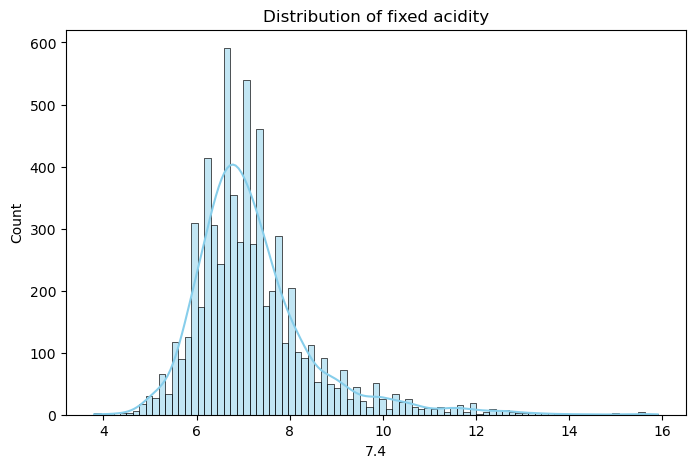

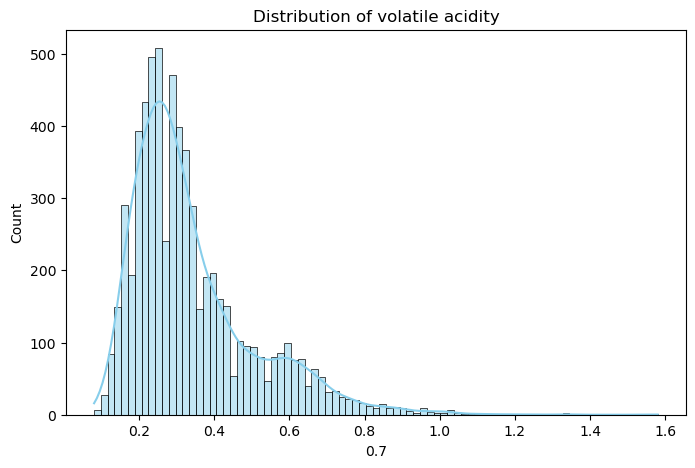

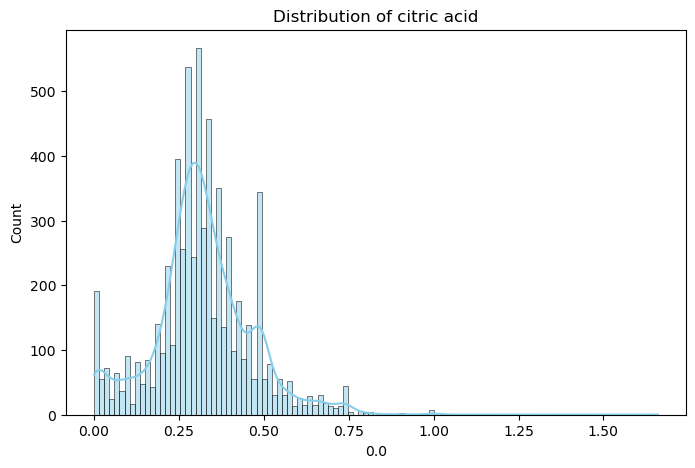

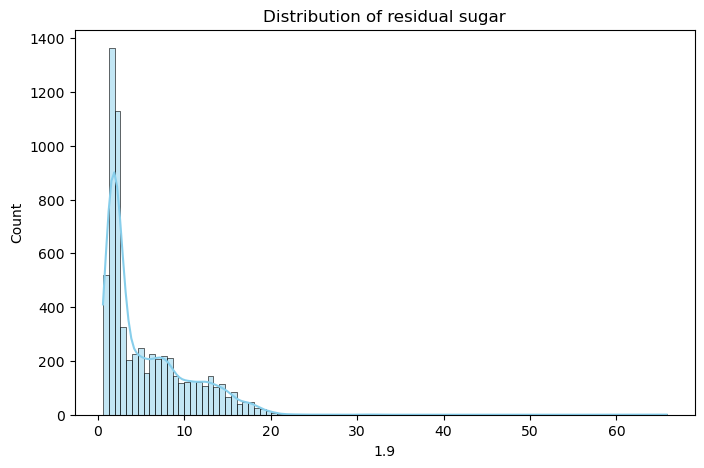

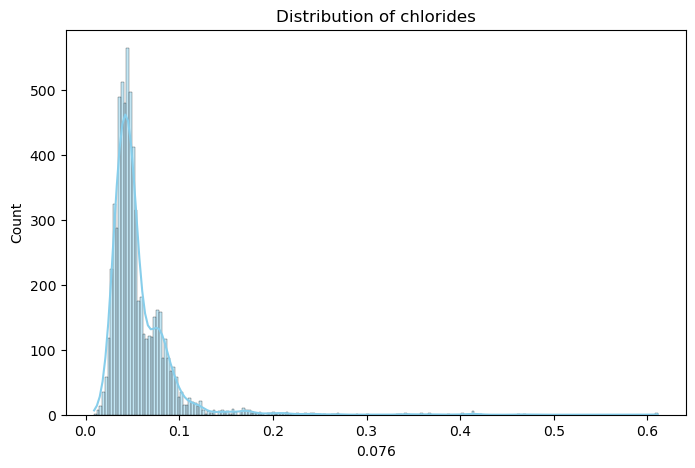

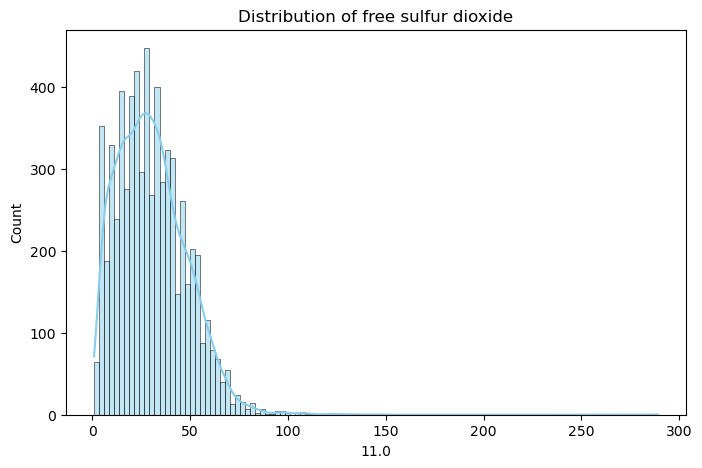

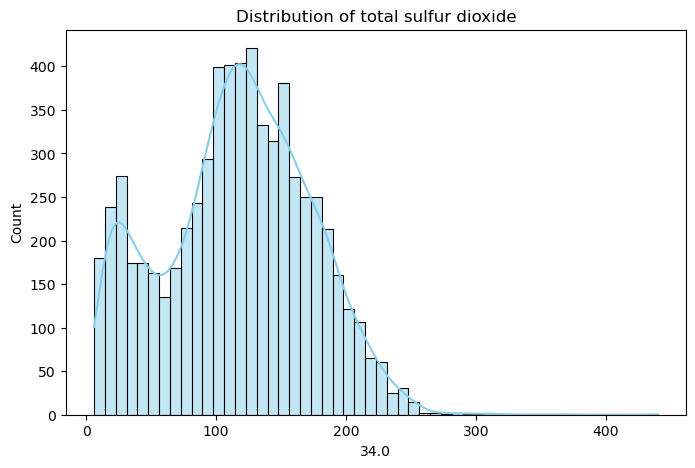

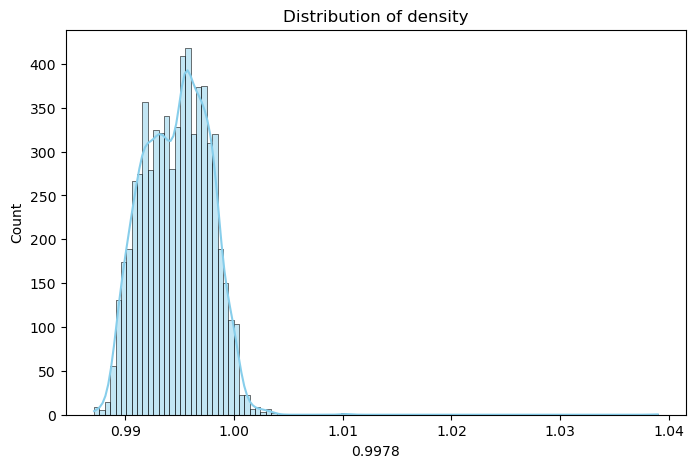

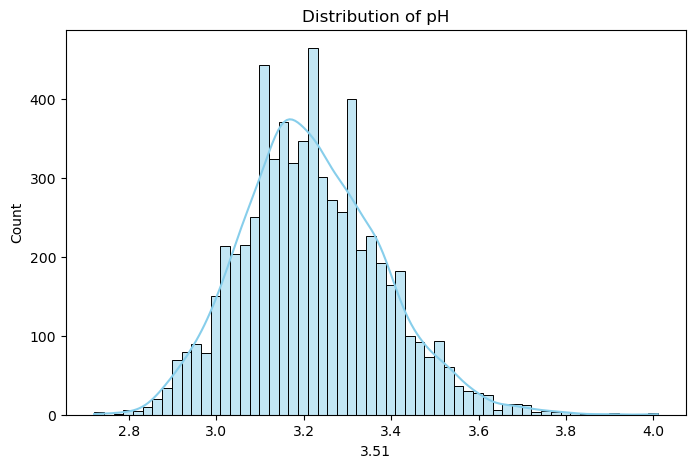

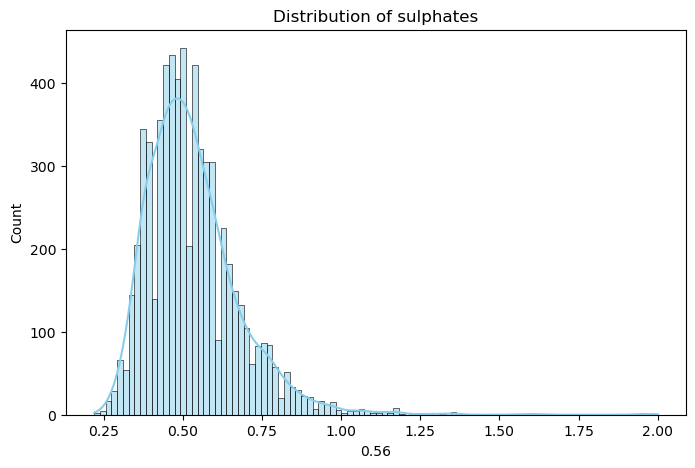

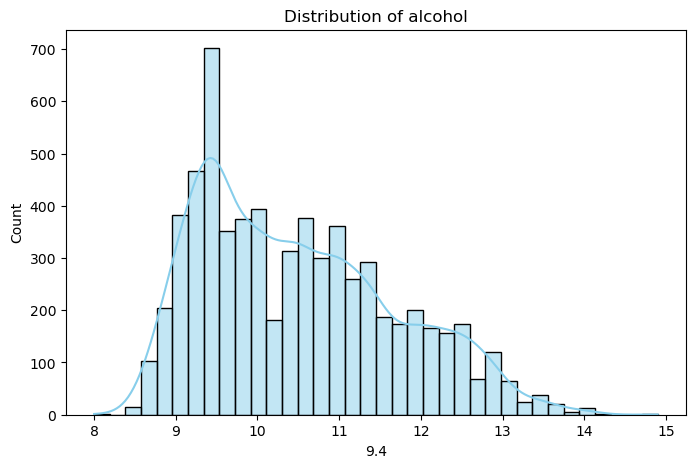

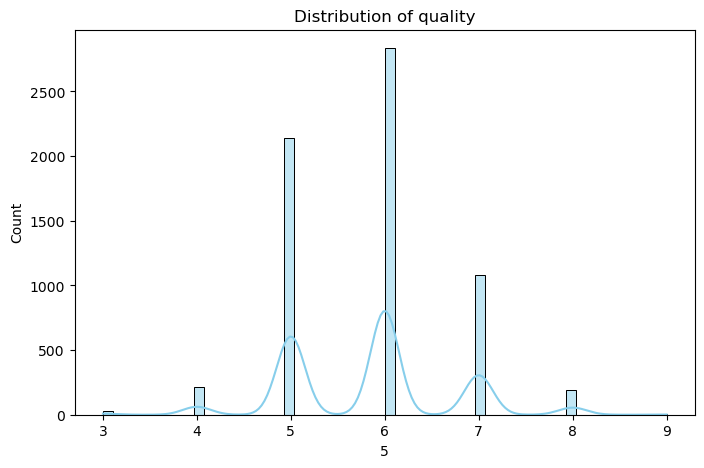

In [17]:
# Visualize the distribution of numeric columns using Seaborn
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged_data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(x_labels[column])  # Set x-axis label
    plt.show()

C:\Users\freed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


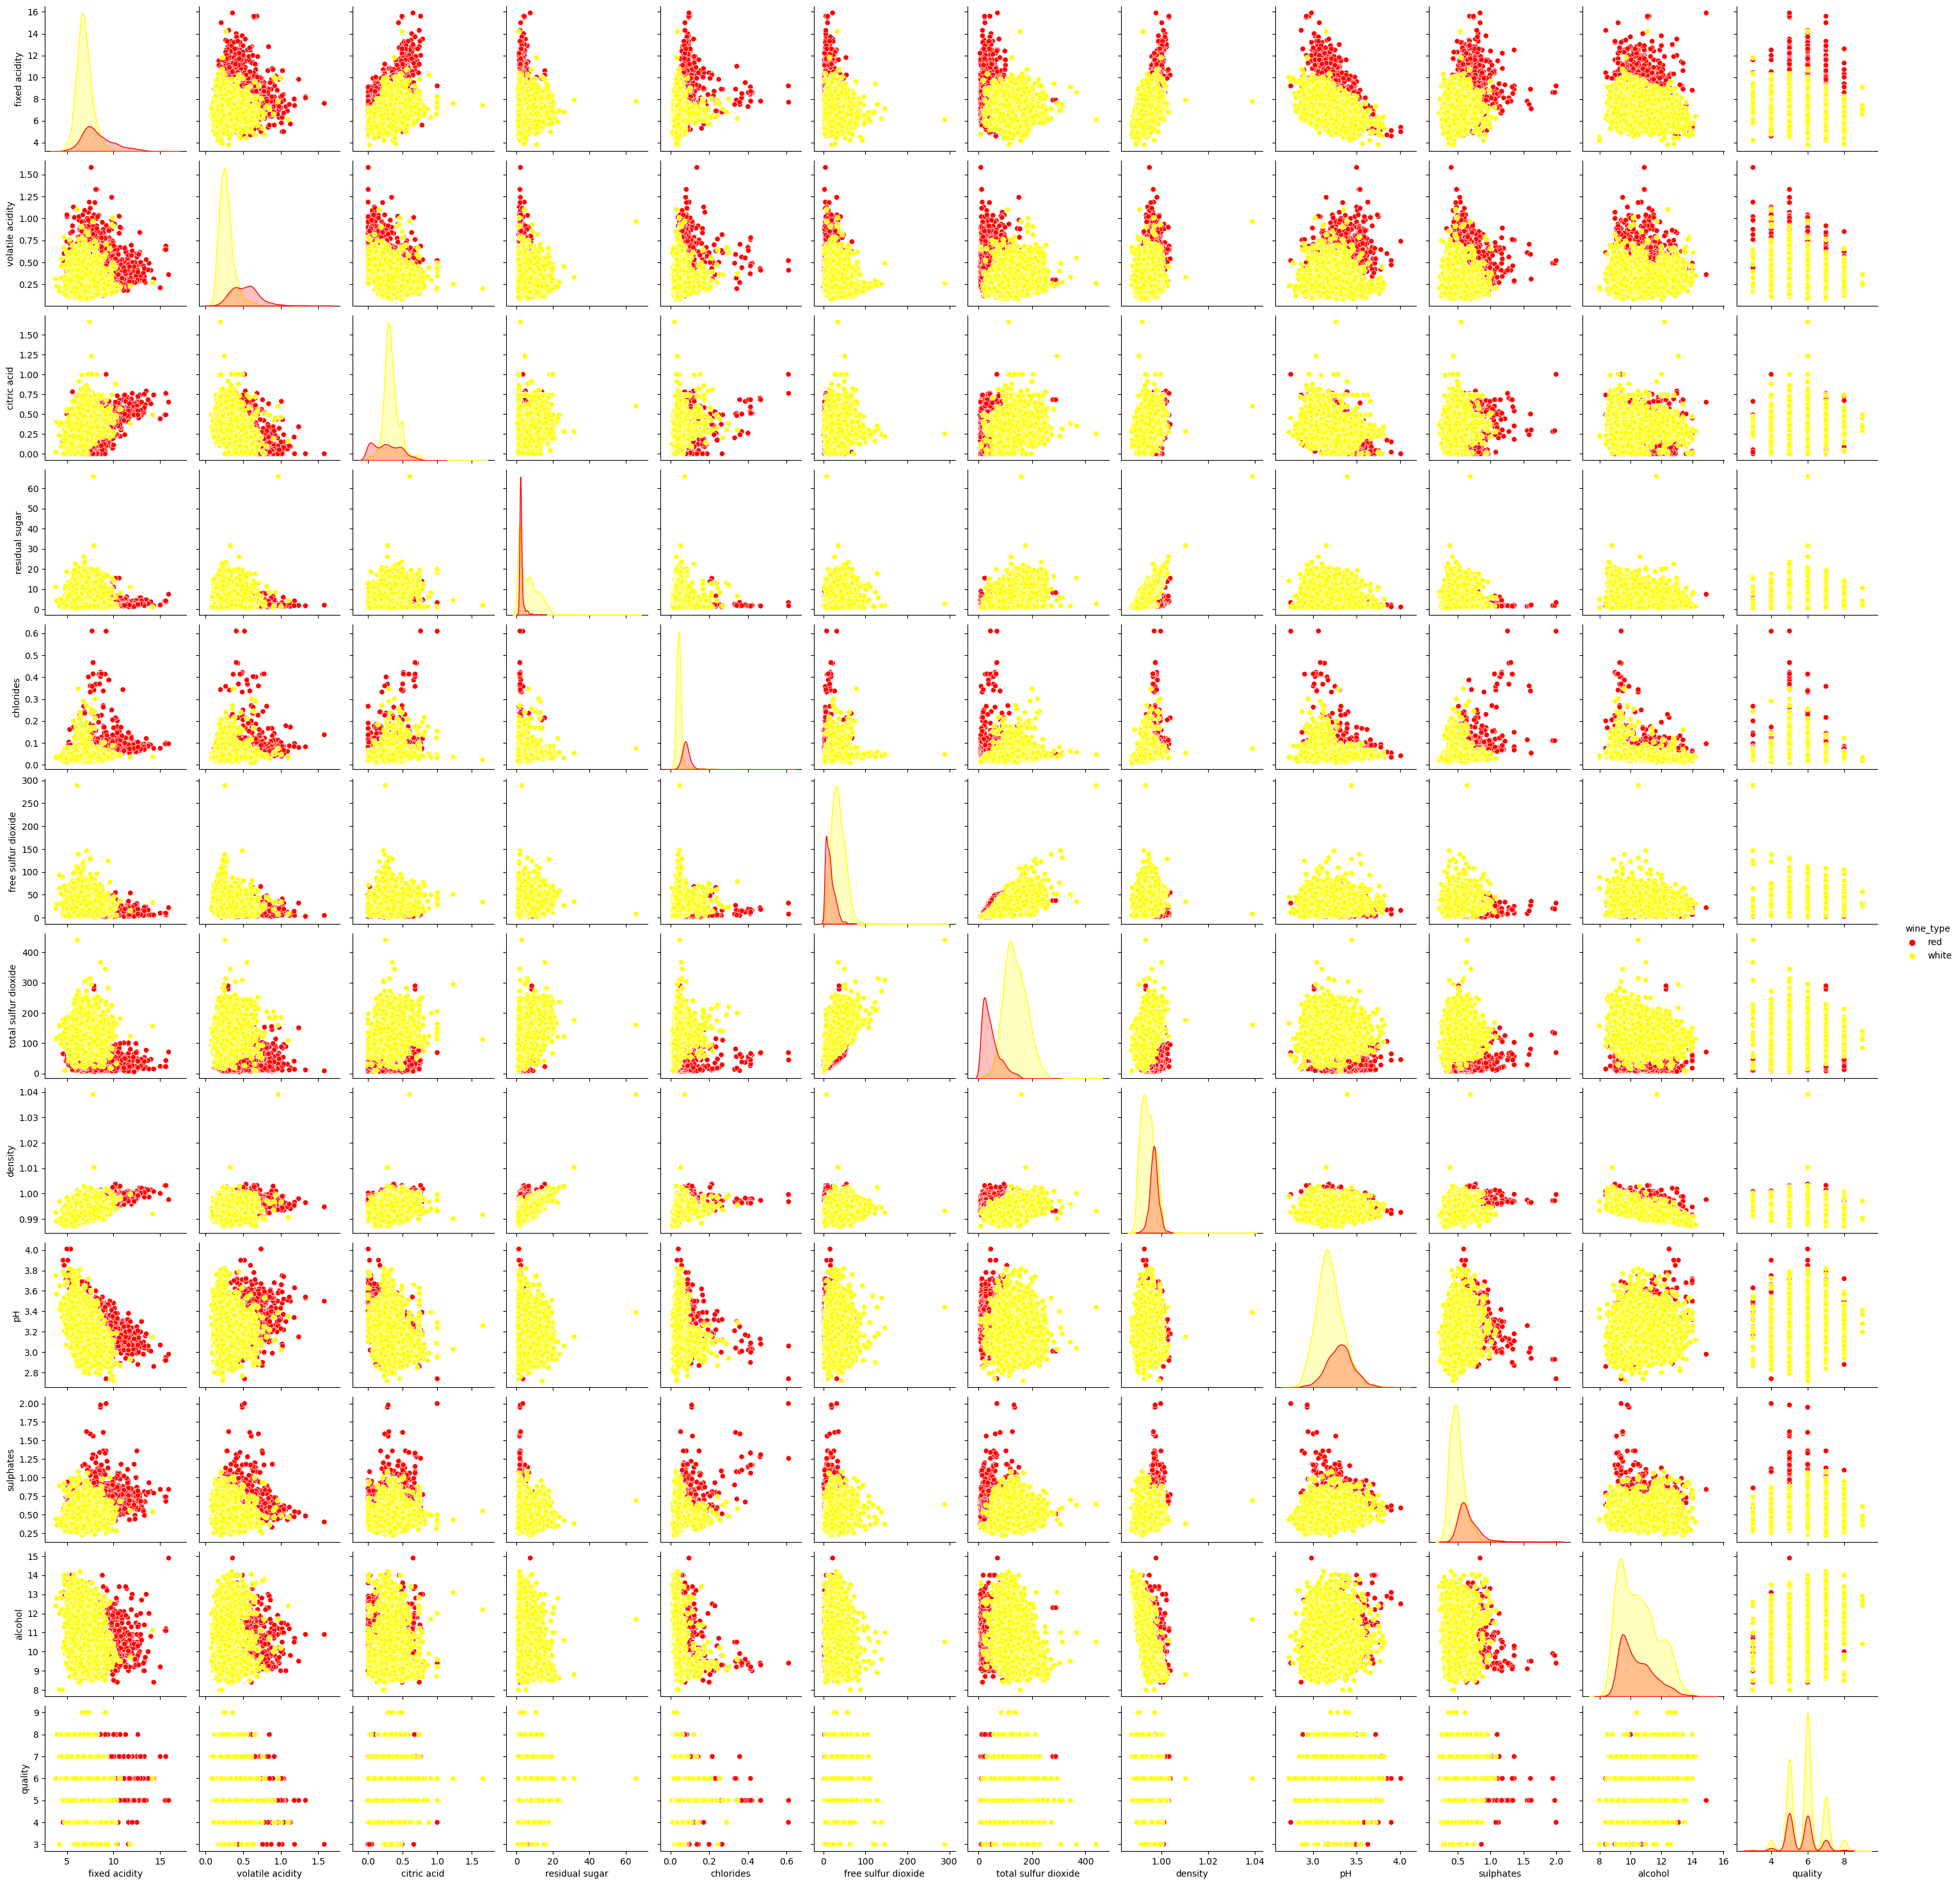

In [20]:
# a. Visualize the differences between red and white wine samples
# Create a pairplot to show relationships between numeric variables
sns.pairplot(merged_data, hue='wine_type', palette={'red': 'red', 'white': 'yellow'})
plt.show()